# Sentimen Analisis 

Di notebook ini saya menganalisis Facebook Review pada Google Play Store

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from nltk.stem import SnowballStemmer # Text Pre-processing
import nltk
nltk.download('stopwords') # Text stopwords

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Disable (false positive) warning 
pd.options.mode.chained_assignment = None  # default='warn'

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/kaggle/input/stop-words-in-28-languages/vietnamese.txt
/kaggle/input/stop-words-in-28-languages/bulgarian.txt
/kaggle/input/stop-words-in-28-languages/ukrainian.txt
/kaggle/input/stop-words-in-28-languages/swedish.txt
/kaggle/input/stop-words-in-28-languages/danish.txt
/kaggle/input/stop-words-in-28-languages/dutch.txt
/kaggle/input/stop-words-in-28-languages/russian.txt
/kaggle/input/stop-words-in-28-languages/slovak.txt
/kaggle/input/stop-words-in-28-languages/hungarian.txt
/kaggle/input/stop-words-in-28-languages/czech.txt
/kaggle/input/stop-words-in-28-languages/turkish.txt
/kaggle/input/stop-words-in-28-languages/malaysian.txt
/kaggle/input/stop-words-in-28-languages/italian.txt
/kaggle/input/stop-words-in-28-languages/catalan.txt
/kaggle/input/stop-words-in-28-languages/arabic.txt
/kaggle/input/stop-words-in-28-languages/norwegian.txt
/kaggle/input/stop-wor

Bisa dilihat, pada notebook ini menggunakan library numpy, pandas, nltk, and snowballstemmer

In [2]:
import pandas
df = pandas.read_excel('/kaggle/input/facebook-review/facebook review.xlsx', index_col=0)
df.head()

,App_Name,Company_Name,Page_URL,Name,Star_rating,Helpful,Comments
1,Facebook,"Meta Platforms, Inc.",https://play.google.com/store/apps/details?id=...,Gobindo Chowdhury,1,1.0,Currently Facebook app looks very bad and bori...
2,Facebook,"Meta Platforms, Inc.",https://play.google.com/store/apps/details?id=...,Roddy Merritt,1,1.0,TERRIBLE!!! One of the biggest tech companies ...
3,Facebook,"Meta Platforms, Inc.",https://play.google.com/store/apps/details?id=...,Kashif A.,1,943.0,Poor and extremely buggy FB & marketplace. Don...
4,Facebook,"Meta Platforms, Inc.",https://play.google.com/store/apps/details?id=...,Karl Barb Engels,3,29.0,The app needs fixing too many things are glitc...
5,Facebook,"Meta Platforms, Inc.",https://play.google.com/store/apps/details?id=...,Jaclynn Danielle,2,27.0,I used to actually be able to keep touch with ...


In [3]:
df

,App_Name,Company_Name,Page_URL,Name,Star_rating,Helpful,Comments
1,Facebook,"Meta Platforms, Inc.",https://play.google.com/store/apps/details?id=...,Gobindo Chowdhury,1,1.0,Currently Facebook app looks very bad and bori...
2,Facebook,"Meta Platforms, Inc.",https://play.google.com/store/apps/details?id=...,Roddy Merritt,1,1.0,TERRIBLE!!! One of the biggest tech companies ...
3,Facebook,"Meta Platforms, Inc.",https://play.google.com/store/apps/details?id=...,Kashif A.,1,943.0,Poor and extremely buggy FB & marketplace. Don...
4,Facebook,"Meta Platforms, Inc.",https://play.google.com/store/apps/details?id=...,Karl Barb Engels,3,29.0,The app needs fixing too many things are glitc...
5,Facebook,"Meta Platforms, Inc.",https://play.google.com/store/apps/details?id=...,Jaclynn Danielle,2,27.0,I used to actually be able to keep touch with ...
...,...,...,...,...,...,...,...
156,Facebook,"Meta Platforms, Inc.",https://play.google.com/store/apps/details?id=...,Benjamin Schäfer,1,133.0,Stop pushing your preferred default behavior w...
157,Facebook,"Meta Platforms, Inc.",https://play.google.com/store/apps/details?id=...,Michelle Cresswell,1,709.0,"Really Facebook/Meta, get a grip!!! Stop messi..."
158,Facebook,"Meta Platforms, Inc.",https://play.google.com/store/apps/details?id=...,Clo Paul,1,376.0,It's getting worse every time there is an upda...
159,Facebook,"Meta Platforms, Inc.",https://play.google.com/store/apps/details?id=...,Jessica Masterson,3,81.0,Alot of ads & such even though you can 'hide' ...


Hasil dataset didapatkan ada 7 kolom yaitu kolom App-Name, Company_Name, Page_URL, Name, Star_rating, Helpful, dan Comments. Data yang di dapatkan sebanyak 160 data dan bertipe data object, int, dan float.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 1 to 160
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   App_Name      160 non-null    object 
 1   Company_Name  160 non-null    object 
 2   Page_URL      160 non-null    object 
 3   Name          160 non-null    object 
 4   Star_rating   160 non-null    int64  
 5   Helpful       159 non-null    float64
 6   Comments      160 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 10.0+ KB


In [5]:
data = df[['Name', 'Star_rating', 'Helpful' ,'Comments']]

data .head()

,Name,Star_rating,Helpful,Comments
1,Gobindo Chowdhury,1,1.0,Currently Facebook app looks very bad and bori...
2,Roddy Merritt,1,1.0,TERRIBLE!!! One of the biggest tech companies ...
3,Kashif A.,1,943.0,Poor and extremely buggy FB & marketplace. Don...
4,Karl Barb Engels,3,29.0,The app needs fixing too many things are glitc...
5,Jaclynn Danielle,2,27.0,I used to actually be able to keep touch with ...


Pada proses ini saya membuat variable baru yaitu data

# Text Preprocessing

Salah satu cara dalam teks mining, dimana teks dirubah ke string dan diolah untuk tahap selanjutnya

In [6]:
#import nltk

In [7]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /usr/share/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /usr/share/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /usr/share/nltk_data...
[nltk_data]    | Downloading pa

True

Mengubah tipe data kolom comment menjadi string agar dapat melakukan pemrosesan data teks

In [8]:
data['Comments'] = data['Comments'].astype(str)

**Case Folding (lower)**

In [9]:
data['Comments'] = data['Comments'].str.lower()

data

,Name,Star_rating,Helpful,Comments
1,Gobindo Chowdhury,1,1.0,currently facebook app looks very bad and bori...
2,Roddy Merritt,1,1.0,terrible!!! one of the biggest tech companies ...
3,Kashif A.,1,943.0,poor and extremely buggy fb & marketplace. don...
4,Karl Barb Engels,3,29.0,the app needs fixing too many things are glitc...
5,Jaclynn Danielle,2,27.0,i used to actually be able to keep touch with ...
...,...,...,...,...
156,Benjamin Schäfer,1,133.0,stop pushing your preferred default behavior w...
157,Michelle Cresswell,1,709.0,"really facebook/meta, get a grip!!! stop messi..."
158,Clo Paul,1,376.0,it's getting worse every time there is an upda...
159,Jessica Masterson,3,81.0,alot of ads & such even though you can 'hide' ...


**Tokenizing** (Ditahap ini akan dilakukan proses number removal, whitecase removal, punctuation removal dan word_tokenize() untuk memecah string kedalam tokens)

In [10]:
import string 
import re 
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist

def remove_links(text):
    # menghapus tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # menghapus non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # menghapus mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # menghapus URL
    return text.replace("http://", " ").replace("https://", " ")
                
data['Comments'] = data['Comments'].apply(remove_links)

In [11]:
#menghapus number
def remove_number(text):
    return  re.sub(r"\d+", " ", text)

data['Comments'] = data['Comments'].apply(remove_number)

In [12]:
#menghapus punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

data['Comments'] = data['Comments'].apply(remove_punctuation)

In [13]:
# menghapus single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", " ", text)

data['Comments'] = data['Comments'].apply(remove_singl_char)

In [14]:
# Tokenisasi 
def word_tokenize_wrapper(text):
    return word_tokenize(text)

data['Comments_tokenize'] = data['Comments'].apply(word_tokenize_wrapper)

In [15]:
data

,Name,Star_rating,Helpful,Comments,Comments_tokenize
1,Gobindo Chowdhury,1,1.0,currently facebook app looks very bad and bori...,"[currently, facebook, app, looks, very, bad, a..."
2,Roddy Merritt,1,1.0,terrible one of the biggest tech companies in ...,"[terrible, one, of, the, biggest, tech, compan..."
3,Kashif A.,1,943.0,poor and extremely buggy fb marketplace dont ...,"[poor, and, extremely, buggy, fb, marketplace,..."
4,Karl Barb Engels,3,29.0,the app needs fixing too many things are glitc...,"[the, app, needs, fixing, too, many, things, a..."
5,Jaclynn Danielle,2,27.0,used to actually be able to keep touch with ...,"[used, to, actually, be, able, to, keep, touch..."
...,...,...,...,...,...
156,Benjamin Schäfer,1,133.0,stop pushing your preferred default behavior w...,"[stop, pushing, your, preferred, default, beha..."
157,Michelle Cresswell,1,709.0,really facebookmeta get grip stop messing no...,"[really, facebookmeta, get, grip, stop, messin..."
158,Clo Paul,1,376.0,its getting worse every time there is an updat...,"[its, getting, worse, every, time, there, is, ..."
159,Jessica Masterson,3,81.0,alot of ads such even though you can hide the...,"[alot, of, ads, such, even, though, you, can, ..."


In [16]:
# Menghitung Distibusi Persebaran Kata
def freqDist_wrapper(text):
    return FreqDist(text)

Comments_fqsist = data['Comments_tokenize'].apply(freqDist_wrapper)

print('Frequency Tokens : \n') 
print(Comments_fqsist.head().apply(lambda x : x.most_common()))

Frequency Tokens : 

1    [(to, 4), (and, 3), (it, 3), (the, 3), (you, 3...
2    [(to, 6), (the, 5), (and, 4), (have, 4), (one,...
3    [(you, 4), (and, 3), (in, 3), (marketplace, 2)...
4    [(things, 3), (are, 3), (you, 2), (or, 2), (no...
5    [(to, 5), (the, 5), (with, 4), (and, 3), (that...
Name: Comments_tokenize, dtype: object


**Normalisasi** ( Pada proses ini akan membersihkan kata yang berupa kata sehari-hari/slank words yang masih berantakan agar menjadi kata indonesia yang benar)

In [17]:
normalizad_word = pd.read_csv("/kaggle/input/abbreviations-and-slangs-for-text-preprocessing/Abbreviations and Slang.csv")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

In [18]:
data['Comments_normalized'] = data['Comments_tokenize'].apply(normalized_term)

Setelah proses diatas disimpan dalam kolom baru yaitu kolom Comments_normalized dimana data teks menyisakan kata yang sudah dinormalisasi.

In [19]:
data

,Name,Star_rating,Helpful,Comments,Comments_tokenize,Comments_normalized
1,Gobindo Chowdhury,1,1.0,currently facebook app looks very bad and bori...,"[currently, facebook, app, looks, very, bad, a...","[currently, facebook, app, looks, very, bad, a..."
2,Roddy Merritt,1,1.0,terrible one of the biggest tech companies in ...,"[terrible, one, of, the, biggest, tech, compan...","[terrible, one, of, the, biggest, tech, compan..."
3,Kashif A.,1,943.0,poor and extremely buggy fb marketplace dont ...,"[poor, and, extremely, buggy, fb, marketplace,...","[poor, and, extremely, buggy, fb, marketplace,..."
4,Karl Barb Engels,3,29.0,the app needs fixing too many things are glitc...,"[the, app, needs, fixing, too, many, things, a...","[the, app, needs, fixing, too, many, things, a..."
5,Jaclynn Danielle,2,27.0,used to actually be able to keep touch with ...,"[used, to, actually, be, able, to, keep, touch...","[used, to, actually, be, able, to, keep, touch..."
...,...,...,...,...,...,...
156,Benjamin Schäfer,1,133.0,stop pushing your preferred default behavior w...,"[stop, pushing, your, preferred, default, beha...","[stop, pushing, your, preferred, default, beha..."
157,Michelle Cresswell,1,709.0,really facebookmeta get grip stop messing no...,"[really, facebookmeta, get, grip, stop, messin...","[really, facebookmeta, get, grip, stop, messin..."
158,Clo Paul,1,376.0,its getting worse every time there is an updat...,"[its, getting, worse, every, time, there, is, ...","[its, getting, worse, every, time, there, is, ..."
159,Jessica Masterson,3,81.0,alot of ads such even though you can hide the...,"[alot, of, ads, such, even, though, you, can, ...","[alot, of, ads, such, even, though, you, can, ..."


**Filtering** (Stopword Removal) Pada tahap ini kita akan menggunakan stopword bahasa indonesia yang didapatkan dari library NLTK untuk filtering terhadap Dataframe.

In [20]:
from nltk.corpus import stopwords

In [21]:
list_stopwords = stopwords.words('english')

In [22]:
#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

data['Comments_stop_removed'] = data['Comments_normalized'].apply(stopwords_removal)

Setelah proses diatas disimpan dalam kolom baru yaitu kolom Comments_stop_removed dimana data teks menyisakan kata bermakna.

In [23]:
data

,Name,Star_rating,Helpful,Comments,Comments_tokenize,Comments_normalized,Comments_stop_removed
1,Gobindo Chowdhury,1,1.0,currently facebook app looks very bad and bori...,"[currently, facebook, app, looks, very, bad, a...","[currently, facebook, app, looks, very, bad, a...","[currently, facebook, app, looks, bad, boring,..."
2,Roddy Merritt,1,1.0,terrible one of the biggest tech companies in ...,"[terrible, one, of, the, biggest, tech, compan...","[terrible, one, of, the, biggest, tech, compan...","[terrible, one, biggest, tech, companies, worl..."
3,Kashif A.,1,943.0,poor and extremely buggy fb marketplace dont ...,"[poor, and, extremely, buggy, fb, marketplace,...","[poor, and, extremely, buggy, fb, marketplace,...","[poor, extremely, buggy, fb, marketplace, dont..."
4,Karl Barb Engels,3,29.0,the app needs fixing too many things are glitc...,"[the, app, needs, fixing, too, many, things, a...","[the, app, needs, fixing, too, many, things, a...","[app, needs, fixing, many, things, glitchy, ha..."
5,Jaclynn Danielle,2,27.0,used to actually be able to keep touch with ...,"[used, to, actually, be, able, to, keep, touch...","[used, to, actually, be, able, to, keep, touch...","[used, actually, able, keep, touch, friends, f..."
...,...,...,...,...,...,...,...
156,Benjamin Schäfer,1,133.0,stop pushing your preferred default behavior w...,"[stop, pushing, your, preferred, default, beha...","[stop, pushing, your, preferred, default, beha...","[stop, pushing, preferred, default, behavior, ..."
157,Michelle Cresswell,1,709.0,really facebookmeta get grip stop messing no...,"[really, facebookmeta, get, grip, stop, messin...","[really, facebookmeta, get, grip, stop, messin...","[really, facebookmeta, get, grip, stop, messin..."
158,Clo Paul,1,376.0,its getting worse every time there is an updat...,"[its, getting, worse, every, time, there, is, ...","[its, getting, worse, every, time, there, is, ...","[getting, worse, every, time, update, im, gett..."
159,Jessica Masterson,3,81.0,alot of ads such even though you can hide the...,"[alot, of, ads, such, even, though, you, can, ...","[alot, of, ads, such, even, though, you, can, ...","[alot, ads, even, though, hide, still, pop, th..."


**Stemming** ( Mencari kata dasar dari sebuah kata/menghapus imbuhan kata )

In [24]:
#!pip install --upgrade pip

In [25]:
stemmer = nltk.SnowballStemmer("english")

def stemmed_wrapper(term): 
    return stemmer.stem(term)

term_dict = {}

for document in data['Comments_stop_removed']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

data['Comments_Stemmed'] = data['Comments_stop_removed'].apply(get_stemmed_term)

1591
------------------------
currently : current
facebook : facebook
app : app
looks : look
bad : bad
boring : bore
used : use
fun : fun
watch : watch
videos : video
current : current
update : updat
forward : forward
backward : backward
option : option
black : black
screen : screen
gives : give
sense : sens
futility : futil
problem : problem
cant : cant
tell : tell
many : mani
times : time
uninstalled : uninstal
installed : instal
go : go
page : page
viewing : view
pictures : pictur
want : want
see : see
middle : middl
picture : pictur
starts : start
showing : show
first : first
repeatedly : repeat
fix : fix
fast : fast
problems : problem
terrible : terribl
one : one
biggest : biggest
tech : tech
companies : compani
world : world
popular : popular
apps : app
continues : continu
absolute : absolut
garbage : garbag
change : chang
made : made
switch : switch
pages : page
interact : interact
like : like
profile : profil
something : someth
wanted : want
needed : need
even : even
confusing 

Setelah proses diatas disimpan dalam kolom baru yaitu kolom Comments_stemmed dimana data teks menyisakan kata yang sudah di stemming.

In [26]:
data

,Name,Star_rating,Helpful,Comments,Comments_tokenize,Comments_normalized,Comments_stop_removed,Comments_Stemmed
1,Gobindo Chowdhury,1,1.0,currently facebook app looks very bad and bori...,"[currently, facebook, app, looks, very, bad, a...","[currently, facebook, app, looks, very, bad, a...","[currently, facebook, app, looks, bad, boring,...","[current, facebook, app, look, bad, bore, use,..."
2,Roddy Merritt,1,1.0,terrible one of the biggest tech companies in ...,"[terrible, one, of, the, biggest, tech, compan...","[terrible, one, of, the, biggest, tech, compan...","[terrible, one, biggest, tech, companies, worl...","[terribl, one, biggest, tech, compani, world, ..."
3,Kashif A.,1,943.0,poor and extremely buggy fb marketplace dont ...,"[poor, and, extremely, buggy, fb, marketplace,...","[poor, and, extremely, buggy, fb, marketplace,...","[poor, extremely, buggy, fb, marketplace, dont...","[poor, extrem, buggi, fb, marketplac, dont, bo..."
4,Karl Barb Engels,3,29.0,the app needs fixing too many things are glitc...,"[the, app, needs, fixing, too, many, things, a...","[the, app, needs, fixing, too, many, things, a...","[app, needs, fixing, many, things, glitchy, ha...","[app, need, fix, mani, thing, glitchi, hard, u..."
5,Jaclynn Danielle,2,27.0,used to actually be able to keep touch with ...,"[used, to, actually, be, able, to, keep, touch...","[used, to, actually, be, able, to, keep, touch...","[used, actually, able, keep, touch, friends, f...","[use, actual, abl, keep, touch, friend, famili..."
...,...,...,...,...,...,...,...,...
156,Benjamin Schäfer,1,133.0,stop pushing your preferred default behavior w...,"[stop, pushing, your, preferred, default, beha...","[stop, pushing, your, preferred, default, beha...","[stop, pushing, preferred, default, behavior, ...","[stop, push, prefer, default, behavior, everi,..."
157,Michelle Cresswell,1,709.0,really facebookmeta get grip stop messing no...,"[really, facebookmeta, get, grip, stop, messin...","[really, facebookmeta, get, grip, stop, messin...","[really, facebookmeta, get, grip, stop, messin...","[realli, facebookmeta, get, grip, stop, mess, ..."
158,Clo Paul,1,376.0,its getting worse every time there is an updat...,"[its, getting, worse, every, time, there, is, ...","[its, getting, worse, every, time, there, is, ...","[getting, worse, every, time, update, im, gett...","[get, wors, everi, time, updat, im, get, notif..."
159,Jessica Masterson,3,81.0,alot of ads such even though you can hide the...,"[alot, of, ads, such, even, though, you, can, ...","[alot, of, ads, such, even, though, you, can, ...","[alot, ads, even, though, hide, still, pop, th...","[alot, ad, even, though, hide, still, pop, the..."


In [27]:
data["Comments_clean"] = [' '.join(map(str, l)) for l in data['Comments_Stemmed']]

Setelah proses diatas disimpan dalam kolom baru yaitu kolom Comments_clean dimana saya menggabungkan lagi kalimat yang sebelumnya sudah ditokenisasi dan dibersihkan.

In [28]:
data

,Name,Star_rating,Helpful,Comments,Comments_tokenize,Comments_normalized,Comments_stop_removed,Comments_Stemmed,Comments_clean
1,Gobindo Chowdhury,1,1.0,currently facebook app looks very bad and bori...,"[currently, facebook, app, looks, very, bad, a...","[currently, facebook, app, looks, very, bad, a...","[currently, facebook, app, looks, bad, boring,...","[current, facebook, app, look, bad, bore, use,...",current facebook app look bad bore use fun wat...
2,Roddy Merritt,1,1.0,terrible one of the biggest tech companies in ...,"[terrible, one, of, the, biggest, tech, compan...","[terrible, one, of, the, biggest, tech, compan...","[terrible, one, biggest, tech, companies, worl...","[terribl, one, biggest, tech, compani, world, ...",terribl one biggest tech compani world one pop...
3,Kashif A.,1,943.0,poor and extremely buggy fb marketplace dont ...,"[poor, and, extremely, buggy, fb, marketplace,...","[poor, and, extremely, buggy, fb, marketplace,...","[poor, extremely, buggy, fb, marketplace, dont...","[poor, extrem, buggi, fb, marketplac, dont, bo...",poor extrem buggi fb marketplac dont bother po...
4,Karl Barb Engels,3,29.0,the app needs fixing too many things are glitc...,"[the, app, needs, fixing, too, many, things, a...","[the, app, needs, fixing, too, many, things, a...","[app, needs, fixing, many, things, glitchy, ha...","[app, need, fix, mani, thing, glitchi, hard, u...",app need fix mani thing glitchi hard use espec...
5,Jaclynn Danielle,2,27.0,used to actually be able to keep touch with ...,"[used, to, actually, be, able, to, keep, touch...","[used, to, actually, be, able, to, keep, touch...","[used, actually, able, keep, touch, friends, f...","[use, actual, abl, keep, touch, friend, famili...",use actual abl keep touch friend famili basic ...
...,...,...,...,...,...,...,...,...,...
156,Benjamin Schäfer,1,133.0,stop pushing your preferred default behavior w...,"[stop, pushing, your, preferred, default, beha...","[stop, pushing, your, preferred, default, beha...","[stop, pushing, preferred, default, behavior, ...","[stop, push, prefer, default, behavior, everi,...",stop push prefer default behavior everi singl ...
157,Michelle Cresswell,1,709.0,really facebookmeta get grip stop messing no...,"[really, facebookmeta, get, grip, stop, messin...","[really, facebookmeta, get, grip, stop, messin...","[really, facebookmeta, get, grip, stop, messin...","[realli, facebookmeta, get, grip, stop, mess, ...",realli facebookmeta get grip stop mess notif t...
158,Clo Paul,1,376.0,its getting worse every time there is an updat...,"[its, getting, worse, every, time, there, is, ...","[its, getting, worse, every, time, there, is, ...","[getting, worse, every, time, update, im, gett...","[get, wors, everi, time, updat, im, get, notif...",get wors everi time updat im get notif ive got...
159,Jessica Masterson,3,81.0,alot of ads such even though you can hide the...,"[alot, of, ads, such, even, though, you, can, ...","[alot, of, ads, such, even, though, you, can, ...","[alot, ads, even, though, hide, still, pop, th...","[alot, ad, even, though, hide, still, pop, the...",alot ad even though hide still pop theyv taken...


lalu disimpan di excel

In [29]:
data.to_excel("facebook_text.xlsx")

# Word Distribution

Disini kita mencari frekuensi data yang banyak digunakan

In [30]:
comments = ' '.join(str(v) for v in data['Comments_clean'])

In [31]:
tokenize_comments = word_tokenize(comments)

In [32]:
tokenize_comments

['current',
 'facebook',
 'app',
 'look',
 'bad',
 'bore',
 'use',
 'fun',
 'watch',
 'video',
 'current',
 'updat',
 'forward',
 'backward',
 'option',
 'black',
 'screen',
 'give',
 'sens',
 'futil',
 'problem',
 'cant',
 'tell',
 'mani',
 'time',
 'uninstal',
 'instal',
 'problem',
 'go',
 'page',
 'view',
 'pictur',
 'want',
 'see',
 'middl',
 'pictur',
 'start',
 'show',
 'first',
 'pictur',
 'repeat',
 'fix',
 'fast',
 'problem',
 'terribl',
 'one',
 'biggest',
 'tech',
 'compani',
 'world',
 'one',
 'popular',
 'app',
 'world',
 'continu',
 'absolut',
 'garbag',
 'chang',
 'made',
 'switch',
 'page',
 'interact',
 'like',
 'profil',
 'someth',
 'one',
 'want',
 'need',
 'made',
 'app',
 'even',
 'confus',
 'harder',
 'use',
 'event',
 'creat',
 'multipl',
 'page',
 'interact',
 'mobil',
 'devic',
 'get',
 'comput',
 'youll',
 'gone',
 'soon',
 'poor',
 'extrem',
 'buggi',
 'fb',
 'marketplac',
 'dont',
 'bother',
 'post',
 'view',
 'marketplac',
 'area',
 'either',
 'use',
 'app

In [33]:
fqdist = FreqDist(tokenize_comments)

In [34]:
fqdist

FreqDist({'app': 177, 'updat': 87, 'cant': 76, 'get': 76, 'facebook': 75, 'time': 74, 'video': 71, 'post': 65, 'use': 64, 'even': 62, ...})

In [35]:
# mencetak 15 kata paling banyak digunakan
fqdist.most_common(15)

[('app', 177),
 ('updat', 87),
 ('cant', 76),
 ('get', 76),
 ('facebook', 75),
 ('time', 74),
 ('video', 71),
 ('post', 65),
 ('use', 64),
 ('even', 62),
 ('page', 61),
 ('log', 59),
 ('tri', 57),
 ('work', 55),
 ('issu', 54)]

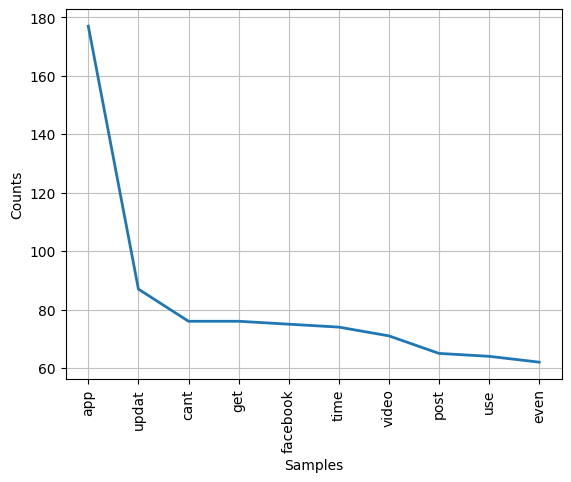

In [36]:
import matplotlib.pyplot as plt

# plotting
fqdist.plot(10,cumulative=False)
plt.show()

* Hasil yang dapat dilihat dari visualisasi persebaran kata yang paling banyak muncul yaitu kata 'app' yang merupakan kata ganti 

# Labeling

Pembagian data menjadi data sentimen berlabel positif dan negatif dengan angka 1 untuk positif dan angka 0 untuk negatif. Pengklasifikasian ini dilakukan pada comment yang memiliki rating 4 dan 5 sebagai sentimen positif dan rating 3 sampai 1 sebagai sentimen negatif.

In [37]:
label = []
for index, row in data.iterrows():
    if row["Star_rating"] == 5 or row["Star_rating"] == 4:
        label.append(1)
    else:
        label.append(0)

data["label"] = label

data

,Name,Star_rating,Helpful,Comments,Comments_tokenize,Comments_normalized,Comments_stop_removed,Comments_Stemmed,Comments_clean,label
1,Gobindo Chowdhury,1,1.0,currently facebook app looks very bad and bori...,"[currently, facebook, app, looks, very, bad, a...","[currently, facebook, app, looks, very, bad, a...","[currently, facebook, app, looks, bad, boring,...","[current, facebook, app, look, bad, bore, use,...",current facebook app look bad bore use fun wat...,0
2,Roddy Merritt,1,1.0,terrible one of the biggest tech companies in ...,"[terrible, one, of, the, biggest, tech, compan...","[terrible, one, of, the, biggest, tech, compan...","[terrible, one, biggest, tech, companies, worl...","[terribl, one, biggest, tech, compani, world, ...",terribl one biggest tech compani world one pop...,0
3,Kashif A.,1,943.0,poor and extremely buggy fb marketplace dont ...,"[poor, and, extremely, buggy, fb, marketplace,...","[poor, and, extremely, buggy, fb, marketplace,...","[poor, extremely, buggy, fb, marketplace, dont...","[poor, extrem, buggi, fb, marketplac, dont, bo...",poor extrem buggi fb marketplac dont bother po...,0
4,Karl Barb Engels,3,29.0,the app needs fixing too many things are glitc...,"[the, app, needs, fixing, too, many, things, a...","[the, app, needs, fixing, too, many, things, a...","[app, needs, fixing, many, things, glitchy, ha...","[app, need, fix, mani, thing, glitchi, hard, u...",app need fix mani thing glitchi hard use espec...,0
5,Jaclynn Danielle,2,27.0,used to actually be able to keep touch with ...,"[used, to, actually, be, able, to, keep, touch...","[used, to, actually, be, able, to, keep, touch...","[used, actually, able, keep, touch, friends, f...","[use, actual, abl, keep, touch, friend, famili...",use actual abl keep touch friend famili basic ...,0
...,...,...,...,...,...,...,...,...,...,...
156,Benjamin Schäfer,1,133.0,stop pushing your preferred default behavior w...,"[stop, pushing, your, preferred, default, beha...","[stop, pushing, your, preferred, default, beha...","[stop, pushing, preferred, default, behavior, ...","[stop, push, prefer, default, behavior, everi,...",stop push prefer default behavior everi singl ...,0
157,Michelle Cresswell,1,709.0,really facebookmeta get grip stop messing no...,"[really, facebookmeta, get, grip, stop, messin...","[really, facebookmeta, get, grip, stop, messin...","[really, facebookmeta, get, grip, stop, messin...","[realli, facebookmeta, get, grip, stop, mess, ...",realli facebookmeta get grip stop mess notif t...,0
158,Clo Paul,1,376.0,its getting worse every time there is an updat...,"[its, getting, worse, every, time, there, is, ...","[its, getting, worse, every, time, there, is, ...","[getting, worse, every, time, update, im, gett...","[get, wors, everi, time, updat, im, get, notif...",get wors everi time updat im get notif ive got...,0
159,Jessica Masterson,3,81.0,alot of ads such even though you can hide the...,"[alot, of, ads, such, even, though, you, can, ...","[alot, of, ads, such, even, though, you, can, ...","[alot, ads, even, though, hide, still, pop, th...","[alot, ad, even, though, hide, still, pop, the...",alot ad even though hide still pop theyv taken...,0


In [38]:
data["label"].value_counts()

label
0    150
1     10
Name: count, dtype: int64

# Perbandingan 

Membuat bar chart untuk mengetahui perbandingan data tersebut

In [39]:
data_label = data[["Name", "Comments_clean", "label"]]

In [40]:
data_label["Comments_clean"] = data_label["Comments_clean"].fillna("No Comments")

In [41]:
data_label.to_excel("data_label.xlsx")

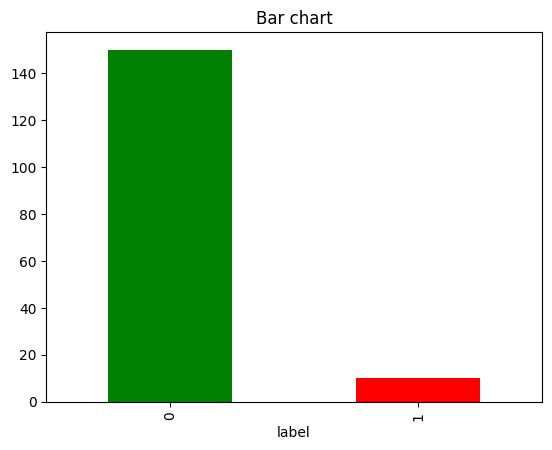

In [42]:
sentimen_data=pd.value_counts(data_label["label"], sort= True)
sentimen_data.plot(kind= 'bar', color= ["green", "red"])
plt.title('Bar chart')
plt.show()

Dapat dilihat bahwa isi comments lebih banyak pada label sentimen 1 atau comments dengan rating postitif ini berarti pelanggan yang menggunakan 

# Ratings

persentase rating yang diberikan kepada Facebook di Google Play Store:

In [43]:
#!pip install plotly==5.15.0

In [44]:
ratings = data["Star_rating"].value_counts()
numbers = ratings.index
quantity = ratings.values
import plotly.express as px
figure = px.pie(data, 
             values=quantity, 
             names=numbers,hole = 0.5)
figure.show()

Bisa dilihat rating facebook pada google play

In [45]:
data['Helpful'].value_counts()

Helpful
1.0      29
2.0      15
3.0      11
6.0       8
7.0       5
         ..
943.0     1
43.0      1
37.0      1
980.0     1
81.0      1
Name: count, Length: 75, dtype: int64

Disini dilihat apakah review bermanfaat 
helpful rating 1.0 lebih banyak dan menunjukkan bahwa tidak bermanfaat
sedangkan rating yang diatas 100.0 lebih sedikit tapi bermanfaat

In [46]:
pd.DataFrame(data.groupby('Star_rating')['Helpful'].mean())

,Helpful
Star_rating,
1,170.356436
2,129.655172
3,147.947368
4,7.125000
5,289.500000


In [47]:
pd.DataFrame(data.groupby('label')['Helpful'].mean())

,Helpful
label,
0,159.577181
1,63.600000


Hubungan Star rating dan Helpful

In [48]:
from wordcloud import WordCloud

# **Comments Negatif dan Positif**

Mencari dan menunjukkan data negatif atau positif

In [49]:
train_s0 = data_label[data_label["label"] == 0] #Negatif
train_s1 = data_label[data_label["label"] == 1] #Positf

In [50]:
train_s0["Comments_clean"] = train_s0["Comments_clean"].fillna("No Comments")
train_s1["Comments_clean"] = train_s1["Comments_clean"].fillna("No Comments")

In [51]:
train_s0

,Name,Comments_clean,label
1,Gobindo Chowdhury,current facebook app look bad bore use fun wat...,0
2,Roddy Merritt,terribl one biggest tech compani world one pop...,0
3,Kashif A.,poor extrem buggi fb marketplac dont bother po...,0
4,Karl Barb Engels,app need fix mani thing glitchi hard use espec...,0
5,Jaclynn Danielle,use actual abl keep touch friend famili basic ...,0
...,...,...,...
156,Benjamin Schäfer,stop push prefer default behavior everi singl ...,0
157,Michelle Cresswell,realli facebookmeta get grip stop mess notif t...,0
158,Clo Paul,get wors everi time updat im get notif ive got...,0
159,Jessica Masterson,alot ad even though hide still pop theyv taken...,0


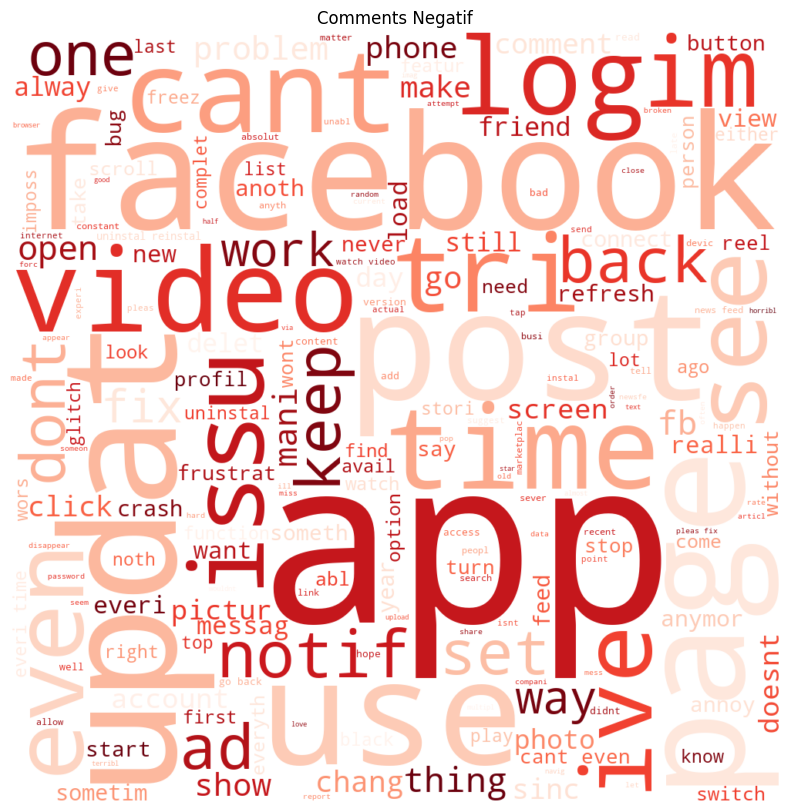

In [52]:
all_text_s0 = ' '.join(word for word in train_s0["Comments_clean"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Comments Negatif")
plt.margins(x=0, y=0)
plt.show()

* Dari visualisasi diatas merupakan wordcloud kata yang paling banyak muncul pada isi comment yang memiliki label sentimen negatif.

In [53]:
train_s1

,Name,Comments_clean,label
27,Sherry Combs,never issu facebook account yesterday alway lo...,1
30,Margarette,love facebook ive facebook user sinc experi sm...,1
52,Ice_Queen1265 And my Little Pack,ive app forev never realli problem suggest may...,1
68,Lara Cantoria,conveni suit app entertain busi stuff also goo...,1
74,Pema Namgay,ive use app past year great app drawback frequ...,1
83,Bright Wiafe,make contact peopl simpl easi fast send receiv...,1
93,Austin Hawkins,think app great real issu ive deal watch reel ...,1
97,youarenotaghost,app good content much app work well enough men...,1
117,Morpheus Arkenveil,ive dedic user fb ever sinc young like first t...,1
123,Sarah Chernatinski,ok work recent stop work connect wifi tri rein...,1


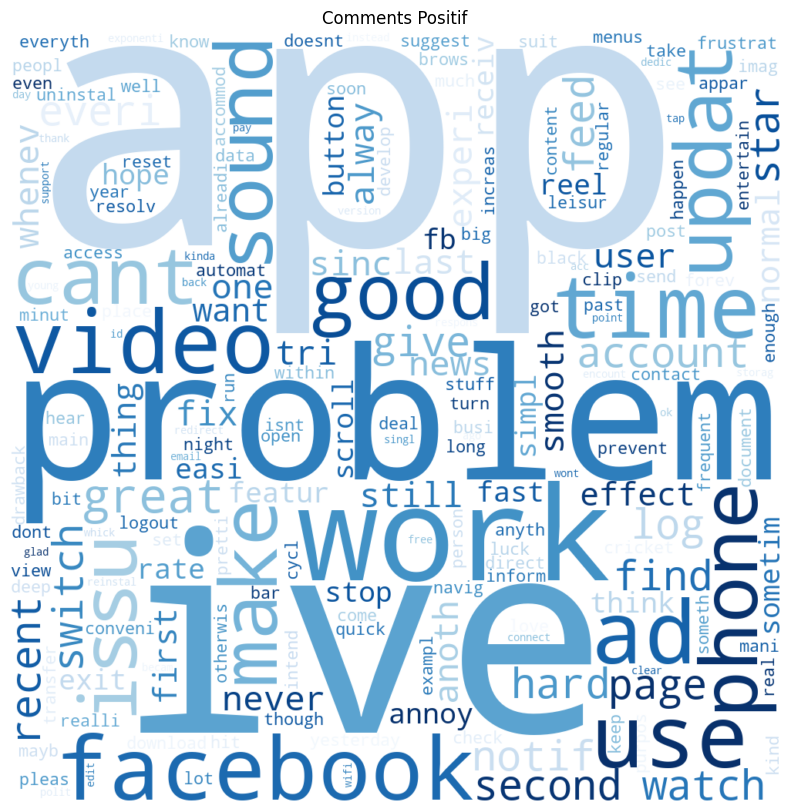

In [54]:
all_text_s1 = ' '.join(word for word in train_s1["Comments_clean"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s1)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Comments Positif")
plt.margins(x=0, y=0)
plt.show()

* Dari visualisasi diatas merupakan wordcloud kata yang paling banyak muncul pada comments yang memiliki label sentimen positif.

# Menyiapkan Data Train dan Test

Pada proses ini saya menggunakan library sklearn.model_selection dengan modul train_test _split untuk membagi data latih (X_train dan y_train) dan data uji (X_test dan y_test) dengan persentasi data latih 70% dan data uji 30% serta memilih label data yaitu yang merupakan variable independen dari data saya yaitu kolom label untuk dijadikan parameter klasifikasi prediksi.

In [55]:
data_label['Comments_clean'] = data_label['Comments_clean'].fillna("No Comments")

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_label['Comments_clean'], data_label['label'], 
                                                    test_size=0.1, stratify=data_label['label'], random_state=30)

# Pembobotan Kata

Pada proses ini saya menggunakan pembobotan TF-IDF(term frequency–inverse document) untuk menghitung manual dengan menggunakan python pembobotan kata dalam dokumen data comments.

In [57]:
#import numpy as np

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(decode_error='replace', encoding='utf-8')

In [59]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(144, 1122)
(16, 1122)


In [60]:
X_train = X_train.toarray()

In [61]:
X_test = X_test.toarray()

# Pengujian Data

Disini saya mencari pengujian pada confusion matriks dengan metode naive bayes. Lalu menghitung masing-masing kelas

In [62]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

In [63]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

#deklarasi metode cross validation
cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=999)
#tuning hyperparameter menggunakan gridsearch

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gscv_nb = GridSearchCV(estimator=nb, 
                 param_grid=params_NB, 
                 cv=cv_method,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 

#Fitting ke Model
gscv_nb.fit(X_train,y_train)
#mendapatkan hyperparameters terbaik
gscv_nb.best_params_

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


{'var_smoothing': 0.006579332246575682}

In [64]:
nb = GaussianNB(var_smoothing=1.0)

In [65]:
nb.fit(X_train, y_train)

GaussianNB(var_smoothing=1.0)

In [66]:
y_pred_nb = nb.predict(X_test)

In [67]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [68]:
print('--------------------- confusion matrix  ----------------------------')
print(confusion_matrix(y_test, y_pred_nb))
print('--------------------- classification report  ----------------------------')
print(classification_report(y_test, y_pred_nb))

--------------------- confusion matrix  ----------------------------
[[ 3 12]
 [ 1  0]]
--------------------- classification report  ----------------------------
              precision    recall  f1-score   support

           0       0.75      0.20      0.32        15
           1       0.00      0.00      0.00         1

    accuracy                           0.19        16
   macro avg       0.38      0.10      0.16        16
weighted avg       0.70      0.19      0.30        16



Setelah dilakukan pembagian data latih dan data uji serta pembobotan tf-idf selanjutnya dapat dilakukan proses klasifikasi prediksi menggunakan model algoritma Naïve Bayes

In [69]:
! ls -al /kaggle/working/

total 1492
drwxr-xr-x 2 root root    4096 Oct 18 05:51 .
drwxr-xr-x 6 root root    4096 Oct 18 05:51 ..
---------- 1 root root 1388934 Oct 18 05:51 __notebook__.ipynb
-rw-r--r-- 1 root root   25002 Oct 18 05:51 data_label.xlsx
-rw-r--r-- 1 root root   98096 Oct 18 05:51 facebook_text.xlsx
